In [2]:
# The objective is to build a prediction model that can predict the price of a car based on its features.

In [4]:

# Perform Exploratory Data Analysis
# Do Data cleaning, processing and feature engineering to determine the most significant variables
# Do correlations analysis
# Build a regression model to predict the price of a car

In [6]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression
import warnings
warnings.filterwarnings('ignore')


In [7]:
df = pd.read_csv('data/vehicles.csv')

In [10]:
#Basic table exploration and data cleaning

In [12]:
# Display the first few rows of the DataFrame
print(df.head(10))
# Get information about the DataFrame (data types, non-null counts, etc.)
print(df.info())
# Get descriptive statistics of numerical columns
print(df.describe())

           id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   
5  7222379453           hudson valley   1600   NaN          NaN   NaN   
6  7221952215           hudson valley   1000   NaN          NaN   NaN   
7  7220195662           hudson valley  15995   NaN          NaN   NaN   
8  7209064557         medford-ashland   5000   NaN          NaN   NaN   
9  7219485069                    erie   3000   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN      

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [17]:
print(df.isnull().sum()) 
#based on results below, attributes such as VIN, drive, size, paint color are frequently missing and seem unreliable to use 
#On the other hand, year, manufacturer, model, fuel, odometer, transmission, title attributes are mostly non-null and hence used for regression analysis

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


In [19]:
# print((df[df['manufacturer']=='gmc'].isnull().sum()))

In [21]:
# Finding unique values for each column
print(df['manufacturer'].unique())
print(df['condition'].unique())
print(df['cylinders'].unique())
print(df['fuel'].unique())
print(df['title_status'].unique())

print(df['transmission'].unique())
print(df['drive'].unique())
print(df['size'].unique())
print(df['type'].unique())


[nan 'gmc' 'chevrolet' 'toyota' 'ford' 'jeep' 'nissan' 'ram' 'mazda'
 'cadillac' 'honda' 'dodge' 'lexus' 'jaguar' 'buick' 'chrysler' 'volvo'
 'audi' 'infiniti' 'lincoln' 'alfa-romeo' 'subaru' 'acura' 'hyundai'
 'mercedes-benz' 'bmw' 'mitsubishi' 'volkswagen' 'porsche' 'kia' 'rover'
 'ferrari' 'mini' 'pontiac' 'fiat' 'tesla' 'saturn' 'mercury'
 'harley-davidson' 'datsun' 'aston-martin' 'land rover' 'morgan']
[nan 'good' 'excellent' 'fair' 'like new' 'new' 'salvage']
[nan '8 cylinders' '6 cylinders' '4 cylinders' '5 cylinders' 'other'
 '3 cylinders' '10 cylinders' '12 cylinders']
[nan 'gas' 'other' 'diesel' 'hybrid' 'electric']
[nan 'clean' 'rebuilt' 'lien' 'salvage' 'missing' 'parts only']
[nan 'other' 'automatic' 'manual']
[nan 'rwd' '4wd' 'fwd']
[nan 'full-size' 'mid-size' 'compact' 'sub-compact']
[nan 'pickup' 'truck' 'other' 'coupe' 'SUV' 'hatchback' 'mini-van' 'sedan'
 'offroad' 'bus' 'van' 'convertible' 'wagon']


In [23]:
# print((df[df['manufacturer']=='gmc'].info()))

In [25]:
# Removing outliers: Remove data poitns where price is beyond 4 std. deviations

# Calculate the mean and standard deviation of the 'price' column
price_mean = df['price'].mean()
price_std = df['price'].std()
price_max = df['price'].max()
price_min = df['price'].min()

# Define a threshold for outliers (e.g., 4 standard deviations)
threshold = 0.0063 
# threshold value chosen through trial & error. If the threshold is reduced beyond this value, the number of outliers jumps from ~190
# to ~57000

df['price_zscore'] = (df['price'] - price_mean) / price_std

# Filter the DataFrame to find data points where the price is beyond 4 standard deviations
outliers = df[abs(df['price_zscore']) > threshold]

outliers.shape


(196, 19)

In [27]:
# Remove the outliers based on the threshold
df_no_outlier = df[abs(df['price_zscore']) <= threshold].copy()

# Drop the temporary 'price_zscore' column
df_no_outlier = df_no_outlier.drop(columns=['price_zscore'])
df_no_outlier.shape

(426684, 18)

In [29]:
#EDA - Find trends and correlations

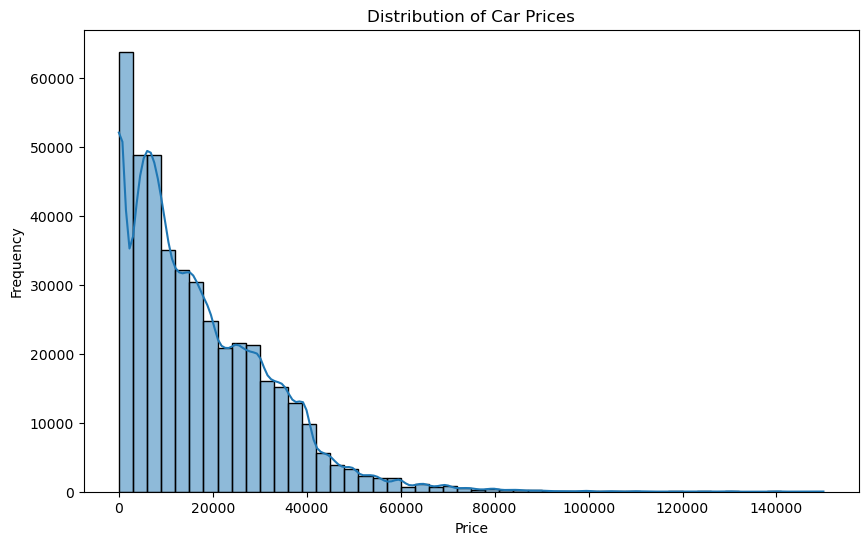

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df_no_outlier['price'], bins=50, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [32]:
df_no_outlier_corr = df_no_outlier[['price','year','odometer']]
correlations = df_no_outlier_corr.corr()
correlations
#Observations
#1: Price is positively correlated with year. This is expected as more recent model will typically cost more
#2: Price is negatively correlated with odometer reading. This is expected as greater the distance driven, lesser will be the car price typically



,price,year,odometer
price,1.000000,0.279554,-0.145791
year,0.279554,1.000000,-0.156877
odometer,-0.145791,-0.156877,1.000000


In [35]:
#average prices by manufacturer
average_price_manuf = df_no_outlier.groupby('manufacturer')['price'].agg(['mean','std'])
average_price_manuf = average_price_manuf.rename(columns={'mean': 'avg. price', 'std': 'std. deviation'})
average_price_manuf = average_price_manuf.sort_values(by='avg. price', ascending=True)
average_price_manuf

,avg. price,std. deviation
manufacturer,,
saturn,5051.506887,4200.909230
mercury,5482.536318,6150.243088
land rover,7911.095238,15025.628426
pontiac,8176.903409,9659.516605
chrysler,10197.386198,9039.677963
hyundai,10719.659412,7719.279487
honda,10751.363722,8735.023184
kia,11083.324820,8309.852927
nissan,11738.885707,9994.296761


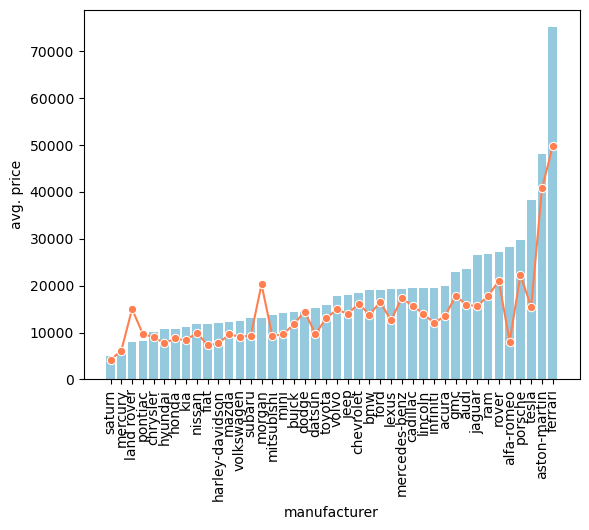

In [37]:
plot = sns.barplot(data=average_price_manuf, x='manufacturer', y='avg. price', color = 'skyblue' )
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

plot = sns.lineplot(data=average_price_manuf, x='manufacturer', y='std. deviation', color='coral', marker='o')
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.show()



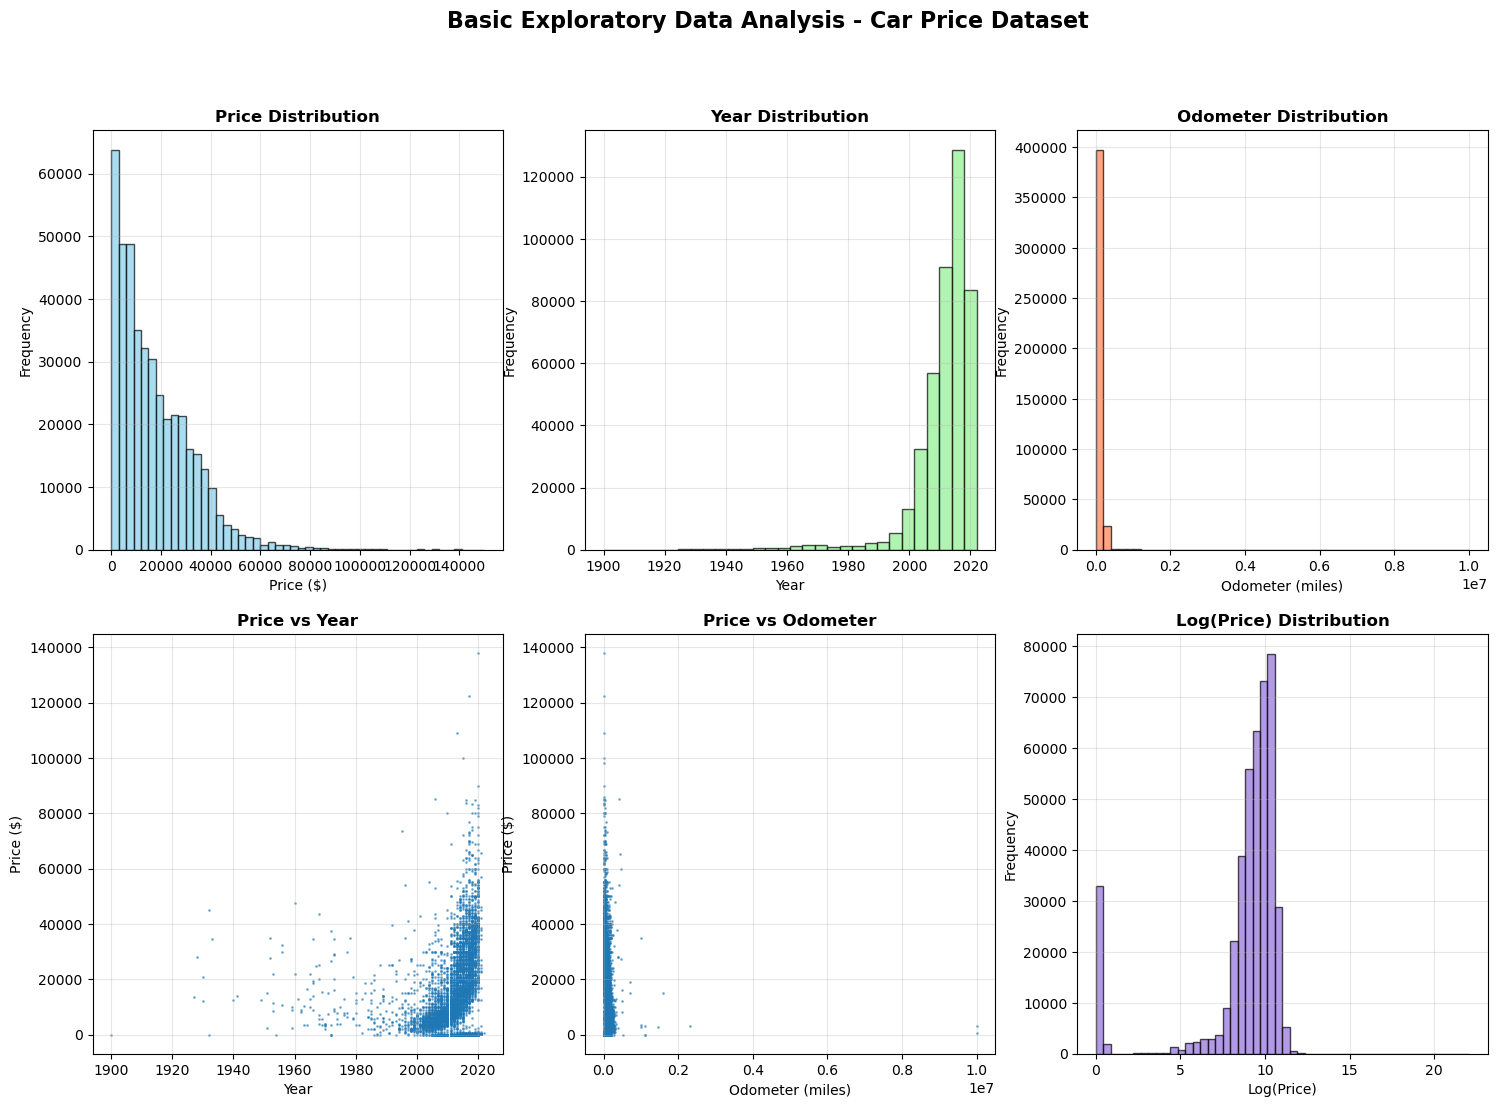

In [43]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Basic Exploratory Data Analysis - Car Price Dataset', fontsize=16, fontweight='bold')

axes[0,0].hist(df_no_outlier['price'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Price Distribution', fontweight='bold')
axes[0,0].set_xlabel('Price ($)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].grid(True, alpha=0.3)


axes[0,1].hist(df_no_outlier['year'].dropna(), bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].set_title('Year Distribution', fontweight='bold')
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('Frequency')
axes[0,1].grid(True, alpha=0.3)

# 3. Odometer Distribution
axes[0,2].hist(df_no_outlier['odometer'].dropna(), bins=50, alpha=0.7, color='coral', edgecolor='black')
axes[0,2].set_title('Odometer Distribution', fontweight='bold')
axes[0,2].set_xlabel('Odometer (miles)')
axes[0,2].set_ylabel('Frequency')
axes[0,2].grid(True, alpha=0.3)


# 4. Price vs Year Scatter Plot
sample_data = df_no_outlier.sample(n=min(5000, len(df)))  # Sample for better visualization
axes[1,0].scatter(sample_data['year'], sample_data['price'], alpha=0.5, s=1)
axes[1,0].set_title('Price vs Year', fontweight='bold')
axes[1,0].set_xlabel('Year')
axes[1,0].set_ylabel('Price ($)')
axes[1,0].grid(True, alpha=0.3)


# 5. Price vs Odometer Scatter Plot
axes[1,1].scatter(sample_data['odometer'], sample_data['price'], alpha=0.5, s=1)
axes[1,1].set_title('Price vs Odometer', fontweight='bold')
axes[1,1].set_xlabel('Odometer (miles)')
axes[1,1].set_ylabel('Price ($)')
axes[1,1].grid(True, alpha=0.3)


 # 6. Log Price Distribution (often more normal)
log_price = np.log1p(df['price'])  # log1p to handle zeros
axes[1,2].hist(log_price, bins=50, alpha=0.7, color='mediumpurple', edgecolor='black')
axes[1,2].set_title('Log(Price) Distribution', fontweight='bold')
axes[1,2].set_xlabel('Log(Price)')
axes[1,2].set_ylabel('Frequency')
axes[1,2].grid(True, alpha=0.3)

In [45]:
#Data Preparation for modeling

class CarPricePreprocessor:
    ## Data cleaning, adding features, imputing & so on
    
    def __init__(self):
        self.label_encoders = {}
        self.scaler = StandardScaler()
        self.feature_names = []
        
    def create_features(self, df):
        #Create new features for better analysis and converting category into numerical features
       
        df_processed = df.copy()
        
        # 1. Create age feature
        current_year = 2025
        df_processed['age'] = current_year - df_processed['year']
        
        # 3. Create luxury brand indicator
        luxury_brands = ['jaguar','ram','rover', 'porsche', 'ferrari', 'aston-martin', 'tesla', 'aston-martin'] #based on avg. prices
        df_processed['is_luxury'] = df_processed['manufacturer'].isin(luxury_brands).astype(int)
        
        # 4. Create condition score (ordinal encoding for condition)
        condition_mapping = {
            'salvage': 1, 'fair': 2, 'good': 3, 'excellent': 4, 'like new': 5, 'new': 6
        }
        df_processed['condition_score'] = df_processed['condition'].map(condition_mapping)
        
        # 5. Create size category score
        size_mapping = {
            'sub-compact': 1, 'compact': 2, 'mid-size': 3, 'full-size': 4
        }
        df_processed['size_score'] = df_processed['size'].map(size_mapping)

        # 6. Create type category score
        type_mapping = {
            'pickup': 1, 'truck': 2, 'other': 3, 'coupe': 4, 'SUV': 5, 'hatchback': 6, 'mini-van': 7, 'sedan': 8, 'offroad': 9, 'bus': 10, 
            'van': 11, 'convertible': 12, 'wagon': 13
        }
        df_processed['type_score'] = df_processed['type'].map(type_mapping)

        return df_processed

    
    def prepare_data(self, df, target_col='price'):
        #Prepare data for modeling: Imputing
        
        # Create features
        df_processed = self.create_features(df)
        
        # Select features for modeling
        numerical_features = ['year', 'odometer', 'age', 'price_per_mile', 'condition_score', 'size_score', 'type_score']
        categorical_features = ['manufacturer', 'model', 'fuel', 'transmission', 'drive', 'type', 'title_status']
        engineered_features = ['is_luxury']
        
        # Handle missing values
        for col in numerical_features:
            if col in df_processed.columns:
                df_processed[col] = df_processed[col].fillna(df_processed[col].median()) #for numerical features, use median value for imputing
        
        for col in categorical_features:
            if col in df_processed.columns:
                df_processed[col] = df_processed[col].fillna('unknown') #fill blanks with unknown
        
        # Encode categorical variables. Convert categories into numbers 1, 2, 3, etc.
        encoded_features = []
        for col in categorical_features:
            if col in df_processed.columns:
                if col not in self.label_encoders:
                    self.label_encoders[col] = LabelEncoder()
                    df_processed[f'{col}_encoded'] = self.label_encoders[col].fit_transform(df_processed[col].astype(str)) #train on the existing train data set
                else:
                    df_processed[f'{col}_encoded'] = self.label_encoders[col].transform(df_processed[col].astype(str)) #apply the learnt encoding to the test data set
                encoded_features.append(f'{col}_encoded')
        
        # Combine all features
        feature_columns = [col for col in numerical_features if col in df_processed.columns]
        feature_columns.extend(encoded_features)
        feature_columns.extend(engineered_features)
        
        # Remove target from features if present
        if target_col in feature_columns:
            feature_columns.remove(target_col)
        
        self.feature_names = feature_columns
        
        # Create feature matrix and target
        X = df_processed[feature_columns].fillna(0)
        y = df_processed[target_col]
        
        return X, y


In [47]:
# Step 1: Create an instance of the preprocessor
preprocessor = CarPricePreprocessor()

# Step 2: Use it to prepare our data
X, y = preprocessor.prepare_data(df_no_outlier, target_col='price')

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("Feature columns:", preprocessor.feature_names)

Features shape: (426684, 14)
Target shape: (426684,)
Feature columns: ['year', 'odometer', 'age', 'condition_score', 'size_score', 'type_score', 'manufacturer_encoded', 'model_encoded', 'fuel_encoded', 'transmission_encoded', 'drive_encoded', 'type_encoded', 'title_status_encoded', 'is_luxury']


In [49]:
#verify there are no nulls since data is preprocessed
#Attributes excluded: cylinders, paint_color 
X.isnull().sum()

year                    0
odometer                0
age                     0
condition_score         0
size_score              0
type_score              0
manufacturer_encoded    0
model_encoded           0
fuel_encoded            0
transmission_encoded    0
drive_encoded           0
type_encoded            0
title_status_encoded    0
is_luxury               0
dtype: int64

In [52]:
class AdvancedLinearRegression:
    # Building multiple prediction models
    
    def __init__(self):
        self.preprocessor = CarPricePreprocessor()
        self.scaler = StandardScaler()
        self.poly_features = None
        self.pca = None
        self.feature_selector = None
        self.model = None
        self.pipeline = None
        self.best_params = {}
        
    def create_polynomial_features(self, X, degree=3, interaction_only=False):
        
        self.poly_features = PolynomialFeatures(
            degree=degree, 
            include_bias=False
        )
        X_poly = self.poly_features.fit_transform(X)
        
        print(f"Original features: {X.shape[1]}")
        print(f"Polynomial features (degree {degree}): {X_poly.shape[1]}")
        return X_poly
    
    def apply_pca(self, X, n_components=None, variance_threshold=0.95):
        
        if n_components is None:
            # Determine components needed for variance threshold
            pca_temp = PCA()
            pca_temp.fit(X)
            cumsum_variance = np.cumsum(pca_temp.explained_variance_ratio_)
            n_components = np.argmax(cumsum_variance >= variance_threshold) + 1
        
        self.pca = PCA(n_components=n_components)
        X_pca = self.pca.fit_transform(X)
        
        print(f"PCA: Reduced from {X.shape[1]} to {X_pca.shape[1]} features")
        print(f"Explained variance ratio: {self.pca.explained_variance_ratio_.sum():.4f}")
        
        return X_pca

    
    def feature_selection(self, X, y, k=50):
        #Select best k features using univariate selection
        from sklearn.feature_selection import SequentialFeatureSelector
        from sklearn.linear_model import LinearRegression

        self.feature_selector = SequentialFeatureSelector(
            estimator=LinearRegression(),
            n_features_to_select=min(k, X.shape[1]),
            direction='forward'
            
        )
        
        X_selected = self.feature_selector.fit_transform(X, y)
        
        print(f"Feature selection: Selected {X_selected.shape[1]} best features")
        return X_selected


    
    def build_pipeline_models(self, X, y):
        #Build multiple pipeline models with different configurations"""
        self.original_feature_names = list(X.columns) if hasattr(X, 'columns') else None
        
        pipelines = {
            'linear_basic': Pipeline([
                ('scaler', StandardScaler()),
                ('regressor', LinearRegression())
            ]),
            
            'linear_poly2': Pipeline([
                ('poly', PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)),
                ('scaler', StandardScaler()),
                ('regressor', LinearRegression())
            ]),
            
            'linear_poly2_pca': Pipeline([
                ('poly', PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)),
                ('scaler', StandardScaler()),
                ('pca', PCA(n_components=50)),
                ('regressor', LinearRegression())
            ]),
            
            'ridge_poly2': Pipeline([
                ('poly', PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)),
                ('scaler', StandardScaler()),
                ('regressor', Ridge(alpha=1.0))
            ]),
            
            'ridge_poly2_pca': Pipeline([
                ('poly', PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)),
                ('scaler', StandardScaler()),
                ('pca', PCA(n_components=100)),
                ('regressor', Ridge(alpha=1.0))
            ]),
            
            'lasso_poly2': Pipeline([
                ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
                ('scaler', StandardScaler()),
                ('regressor', Lasso(alpha=100.0, max_iter=2000))
            ]),
            
            'elastic_poly2_pca': Pipeline([
                ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
                ('scaler', StandardScaler()),
                ('pca', PCA(n_components=75)),
                ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.5, max_iter=2000))
            ])
        }
        
        return pipelines
    
    def evaluate_models(self, X, y, test_size=0.2, random_state=42):
        # Evaluate all models
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state
        )
        
        # Build pipelines
        pipelines = self.build_pipeline_models(X_train, y_train)
        
        results = {}
        
        print("Evaluating Models...")
        print("=" * 60)
        
        for name, pipeline in pipelines.items():
            try:
                # Fit model
                pipeline.fit(X_train, y_train)
                
                # Predictions
                y_train_pred = pipeline.predict(X_train)
                y_test_pred = pipeline.predict(X_test)
                
                # Calculate metrics
                train_r2 = r2_score(y_train, y_train_pred)
                test_r2 = r2_score(y_test, y_test_pred)
                train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
                test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
                test_mae = mean_absolute_error(y_test, y_test_pred)
                
                # Cross-validation score
                cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
                
                results[name] = {
                    'pipeline': pipeline,
                    'train_r2': train_r2,
                    'test_r2': test_r2,
                    'train_rmse': train_rmse,
                    'test_rmse': test_rmse,
                    'test_mae': test_mae,
                    'cv_mean': cv_scores.mean(),
                    'cv_std': cv_scores.std(),
                    'y_test_pred': y_test_pred,
                    'y_test_true': y_test
                }
                
                print(f"{name:20} | R²: {test_r2} | RMSE: ${test_rmse} | CV: {cv_scores.mean()}±{cv_scores.std()}")
                
            except Exception as e:
                print(f"Error with {name}: {str(e)}")
                continue
        
        return results, X_test, y_test
    
    def hyperparameter_tuning(self, X, y, model_name='ridge_poly2_pca'):  
        #Perform gridsearch hyperparameter tuning for the best model
        
        print(f"\nHyperparameter Tuning for {model_name}...")
        print("-" * 50)
        
        if model_name == 'ridge_poly2_pca':
            pipeline = Pipeline([
                ('poly', PolynomialFeatures(degree=2, include_bias=False)),
                ('scaler', StandardScaler()),
                ('pca', PCA()),
                ('regressor', Ridge())
            ])
            
            param_grid = {
                'pca__n_components': [50, 75, 100, 150],
                'regressor__alpha': [0.1, 1.0, 10.0, 100.0]
            }
            
        elif model_name == 'lasso_poly2':
            pipeline = Pipeline([
                ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
                ('scaler', StandardScaler()),
                ('regressor', Lasso(max_iter=2000))
            ])
            
            param_grid = {
                'regressor__alpha': [1.0, 10.0, 100.0, 1000.0]
            }
        
        else:  # Default to ridge
            pipeline = Pipeline([
                ('poly', PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)),
                ('scaler', StandardScaler()),
                ('regressor', Ridge())
            ])
            
            param_grid = {
                'regressor__alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]
            }
        
        # Grid search
        grid_search = GridSearchCV(
            pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1
        )
        
        grid_search.fit(X, y)
        
        self.best_params = grid_search.best_params_
        self.pipeline = grid_search.best_estimator_
        
        print(f"Best parameters: {self.best_params}")
        print(f"Best CV score: {grid_search.best_score_:.4f}")
        
        return grid_search.best_estimator_
    
    def plot_results(self, results):
        """Plot model comparison and results"""
        
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('Linear Regression Model Results', fontsize=16, fontweight='bold')
        
        # Model comparison
        model_names = list(results.keys())
        test_r2_scores = [results[name]['test_r2'] for name in model_names]
        test_rmse_scores = [results[name]['test_rmse'] for name in model_names]
        
        # R² comparison
        axes[0,0].bar(range(len(model_names)), test_r2_scores, color='lightblue', alpha=0.7)
        axes[0,0].set_title('Model R² Comparison', fontweight='bold')
        axes[0,0].set_xlabel('Model')
        axes[0,0].set_ylabel('R² Score')
        axes[0,0].set_xticks(range(len(model_names)))
        axes[0,0].set_xticklabels(model_names, rotation=45, ha='right')
        axes[0,0].grid(True, alpha=0.3)
        
        # RMSE comparison
        axes[0,1].bar(range(len(model_names)), test_rmse_scores, color='lightcoral', alpha=0.7)
        axes[0,1].set_title('Model RMSE Comparison', fontweight='bold')
        axes[0,1].set_xlabel('Model')
        axes[0,1].set_ylabel('RMSE ($)')
        axes[0,1].set_xticks(range(len(model_names)))
        axes[0,1].set_xticklabels(model_names, rotation=45, ha='right')
        axes[0,1].grid(True, alpha=0.3)
        
        # Prediction vs Actual for best model
        best_model_name = max(results.keys(), key=lambda x: results[x]['test_r2'])
        best_result = results[best_model_name]
        
        axes[1,0].scatter(best_result['y_test_true'], best_result['y_test_pred'], alpha=0.6, s=20)
        # axes[1,0].plot([best_result['y_test_true'].min(), best_result['y_test_true'].max()], 
        #                [best_result['y_test_true'].min(), best_result['y_test_true'].max()], 
        #                'r--', lw=2)
        axes[1,0].set_title(f'Predictions vs Actual - {best_model_name}', fontweight='bold')
        axes[1,0].set_xlabel('Actual Price ($)')
        axes[1,0].set_ylabel('Predicted Price ($)')
        axes[1,0].grid(True, alpha=0.3)
        
        # Residuals plot
        residuals = best_result['y_test_true'] - best_result['y_test_pred']
        axes[1,1].scatter(best_result['y_test_pred'], residuals, alpha=0.6, s=20)
        axes[1,1].axhline(y=0, color='r', linestyle='--')
        axes[1,1].set_title(f'Residuals Plot - {best_model_name}', fontweight='bold')
        axes[1,1].set_xlabel('Predicted Price ($)')
        axes[1,1].set_ylabel('Residuals ($)')
        axes[1,1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        return best_model_name

    def get_top_features(self, results, pipeline_name, top_n=10):
        """
        Get top N most important features from a trained pipeline
        """
        if pipeline_name not in results:
            print(f"Available pipelines: {list(results.keys())}")
            return None
        
        pipeline = results[pipeline_name]['pipeline']
        regressor = pipeline.named_steps['regressor']
        coefficients = np.abs(regressor.coef_)
        
        # Get feature names based on pipeline type
        if 'poly' in pipeline.named_steps:
            # For polynomial models, try to get meaningful names
            poly_transformer = pipeline.named_steps['poly']
            if hasattr(self, 'original_feature_names') and self.original_feature_names:
                try:
                    
                    feature_names = poly_transformer.get_feature_names_out(self.original_feature_names)
                except:
                    
                    feature_names = [f'poly_feature_{i}' for i in range(len(coefficients))]
            else:
                feature_names = [f'poly_feature_{i}' for i in range(len(coefficients))]
        else:
            # For basic linear model
            if hasattr(self, 'original_feature_names') and self.original_feature_names:
                feature_names = self.original_feature_names
            else:
                feature_names = [f'feature_{i}' for i in range(len(coefficients))]
        
        # Combine and sort by importance
        feature_importance = list(zip(feature_names, coefficients))
        feature_importance.sort(key=lambda x: x[1], reverse=True)
        
        # Get top N features
        top_features = feature_importance[:top_n]
        
        # Print results
        print(f"\nTop {top_n} features for {pipeline_name}:")
        print("-" * 60)
        for i, (feature, importance) in enumerate(top_features, 1):
            print(f"{i:2d}. {feature:<35} | {importance:.4f}")
        
        return top_features


    

In [ ]:
advanced_lr = AdvancedLinearRegression()

results, X_test, y_test = advanced_lr.evaluate_models(X, y) #X, y are derived after processing the original data after

# Linear with polynomial features
print("\n LINEAR POLYNOMIAL MODEL:")
linear_poly_features = advanced_lr.get_top_features(results, 'linear_poly2', top_n=10)

# Ridge with polynomial features  
print("\n RIDGE POLYNOMIAL MODEL:")
ridge_poly_features = advanced_lr.get_top_features(results, 'ridge_poly2', top_n=10)

# Lasso with polynomial features
print("\n LASSO POLYNOMIAL MODEL:")
lasso_poly_features = advanced_lr.get_top_features(results, 'lasso_poly2', top_n=10)


Evaluating Models...
linear_basic         | R²: 0.2127094803382178 | RMSE: $13464.282322352647 | CV: 0.2110620549939896±0.0029206434313991357
linear_poly2         | R²: 0.3985702687879037 | RMSE: $11768.14864002338 | CV: 0.3975877264162112±0.0036440908937827535
linear_poly2_pca     | R²: 0.354779058335277 | RMSE: $12189.051889773107 | CV: 0.35738642704036716±0.001810449238644167
ridge_poly2          | R²: 0.3985851495798184 | RMSE: $11768.003053228053 | CV: 0.39913578093150665±0.0033776690488663726
ridge_poly2_pca      | R²: 0.3977651061741899 | RMSE: $11776.02329577875 | CV: 0.3983878046388403±0.003341203850045112


In [ ]:
advanced_lr.plot_results(results)